In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import os
import warnings
import platform

#인터프리터 유지
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
warnings.filterwarnings('ignore')

#한글 폰트 사용시 마이너스 폰트 깨짐 해결
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
else: #윈도우
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

# seaborn palette
palette = ['Set2', 'coolwarm', 'cubehelix', 'pastel']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']

## 1. 데이터 로드 및 확인

In [1]:
df = pd.read_csv("./Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# 데이터 및 컬럼 개수 확인
print(df.shape)
display(df.head())

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum() # 결측치 11개 존재

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df[df['TotalCharges'].isnull()]['tenure'].value_counts()

0    11
Name: tenure, dtype: int64

In [6]:
# 결측치 처리
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# 요약 통계량
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## 2. EDA 및 전처리

### 2-1. Target 변수(Chrun) 시각화

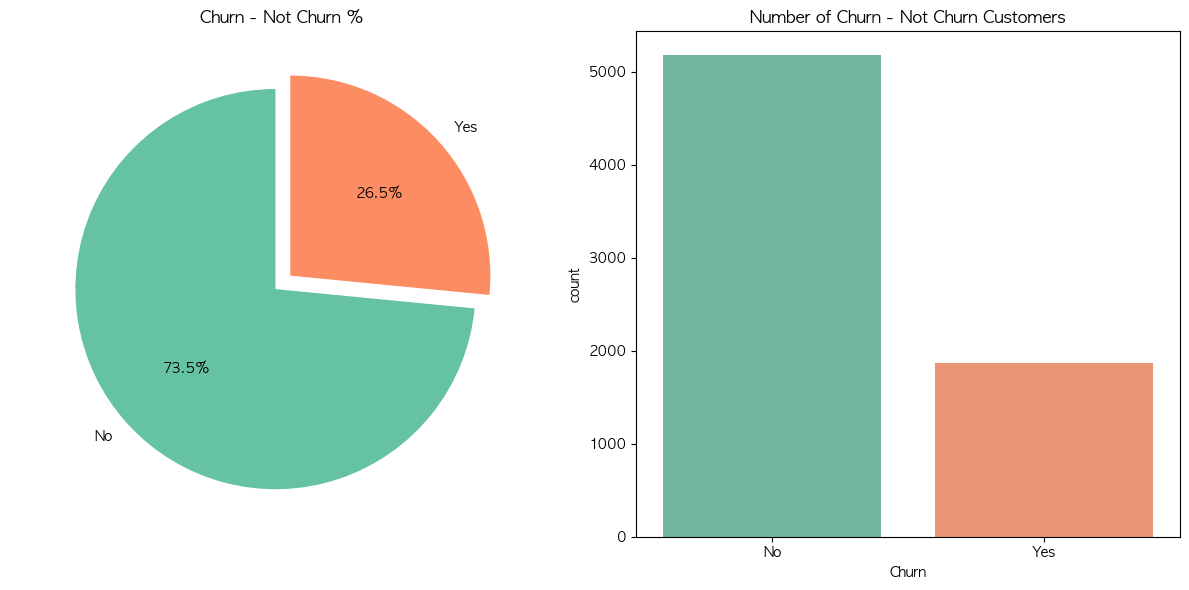

In [8]:
sizes = df['Churn'].value_counts()
labels = sizes.index

fig = plt.subplots(1, 2, figsize=(12,6))

# 파이차트 만들기
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90, explode=(0.1,0), colors=colors)
plt.axis('equal')
plt.title('Churn - Not Churn %')

# 바 그래프 만들기
plt.subplot(1,2,2)
sns.countplot(x='Churn', data=df, palette=palette[0])
plt.title('Number of Churn - Not Churn Customers')

plt.tight_layout()
plt.show()

### 2-2. Categorical 변수 시각화


#### Group 1: 고객 정보

Gender | SeniorCitizen | Partner | Dependents |

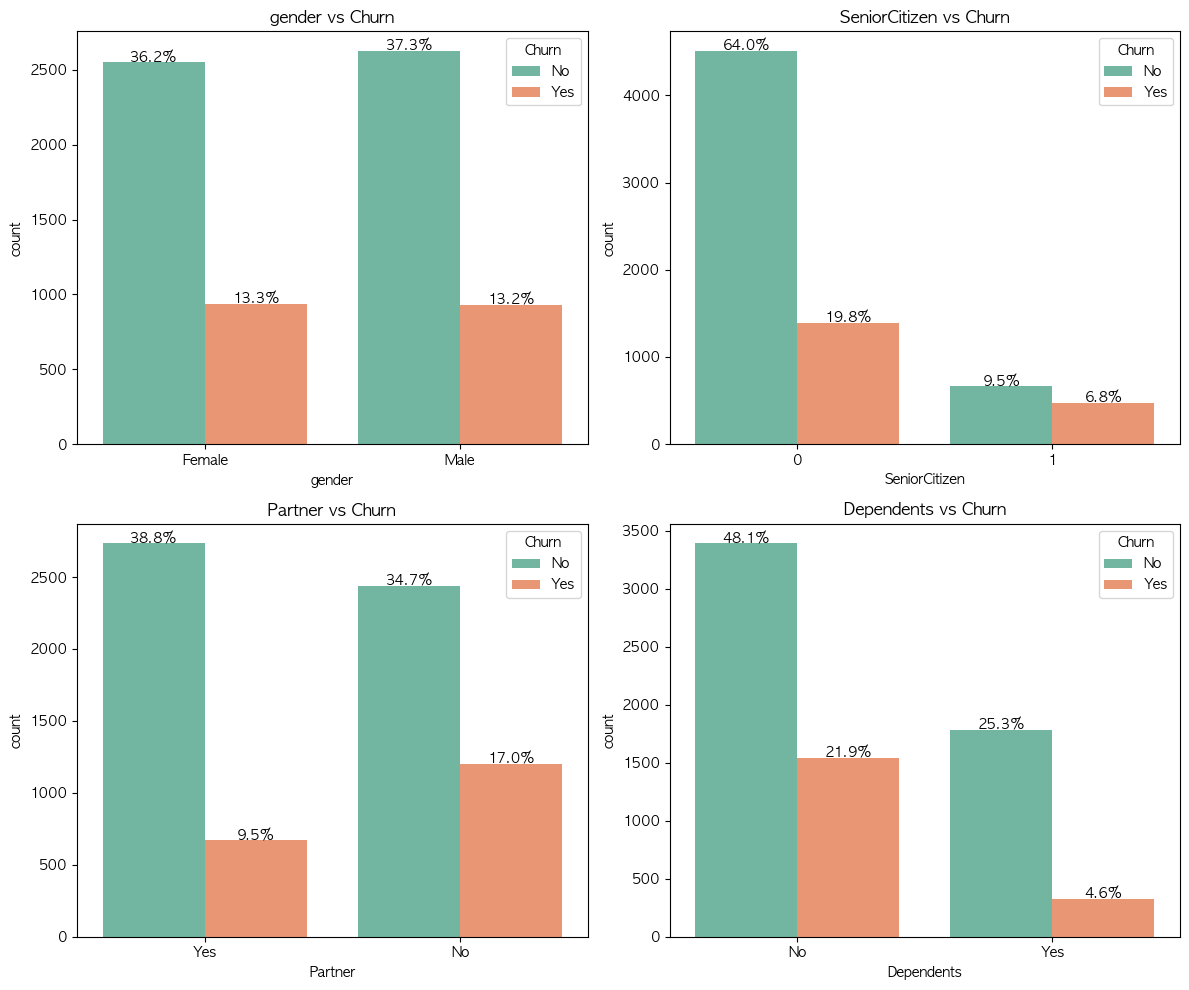

In [8]:
# 고객정보
cust_info = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig = plt.subplots(2, 2, figsize=(12,10))

for i in range(len(cust_info)):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=cust_info[i], data=df, hue="Churn", palette=palette[0])
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / len(df)) * 100  # 퍼센티지 계산
        if percentage > 0:
            ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / len(df)) * 100), ha='center')
        
    title = cust_info[i] + ' vs Churn'
    plt.title(title)

plt.tight_layout()
plt.show()

#### Group 2: 전화 및 인터넷 서비스 정보

PhoneService | MultipleLines | InternetService

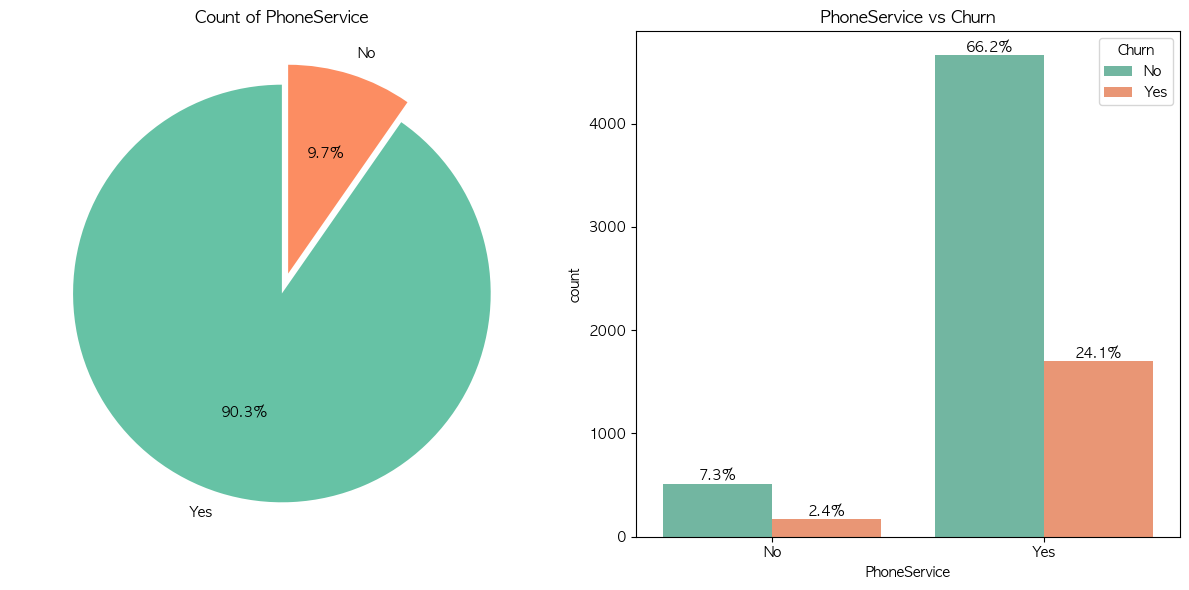

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
col = 'PhoneService'

sizes = df[col].value_counts()
labels = sizes.index
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0.1, 0), startangle=90, colors=colors)
axes[0].set_title('Count of ' + col)
axes[0].axis('equal')

sns.countplot(x=col, data=df, hue='Churn', palette=palette[0], ax=axes[1])

for p in axes[1].patches:
    height = p.get_height()
    percentage = (height / len(df)) * 100  # 퍼센티지 계산
    if percentage > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.5,
                     '{:.1f}%'.format(percentage),
                     ha='center', va='bottom')

axes[1].set_title(col + ' vs Churn')
plt.tight_layout()
plt.show()

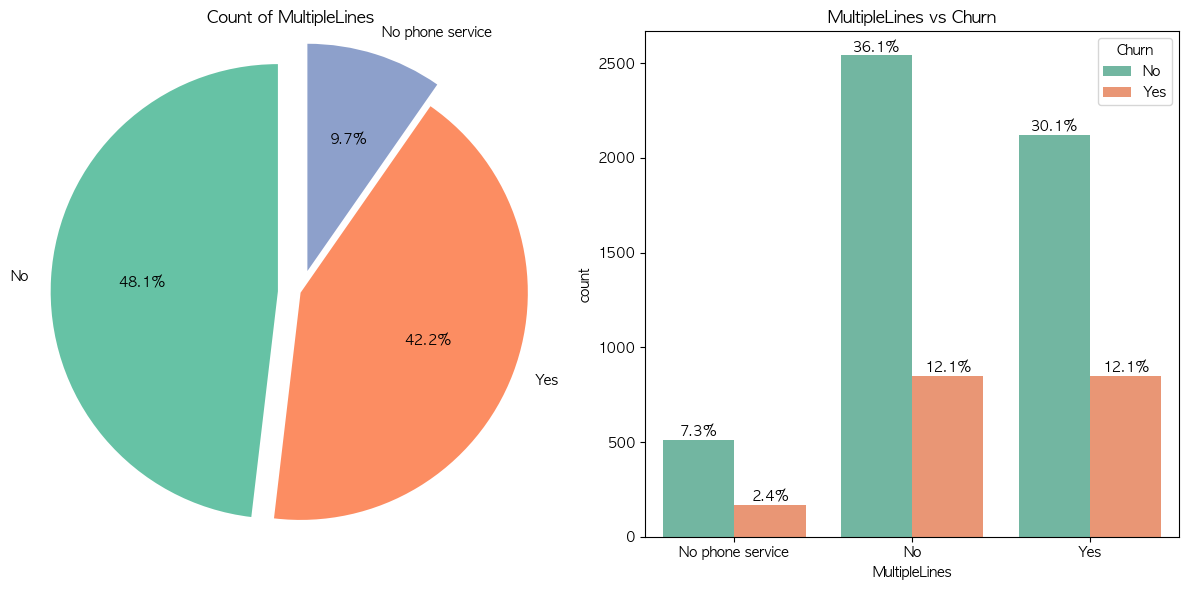

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
col = 'MultipleLines'

sizes = df[col].value_counts()
labels = sizes.index
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0.1, 0., 0.1), startangle=90, colors=colors)
axes[0].set_title('Count of ' + col)
axes[0].axis('equal')

sns.countplot(x=col, data=df, hue='Churn', palette=palette[0], ax=axes[1])

for p in axes[1].patches:
    height = p.get_height()
    percentage = (height / len(df)) * 100  # 퍼센티지 계산
    if percentage > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.5,
                     '{:.1f}%'.format(percentage),
                     ha='center', va='bottom')

axes[1].set_title(col + ' vs Churn')
plt.tight_layout()
plt.show()

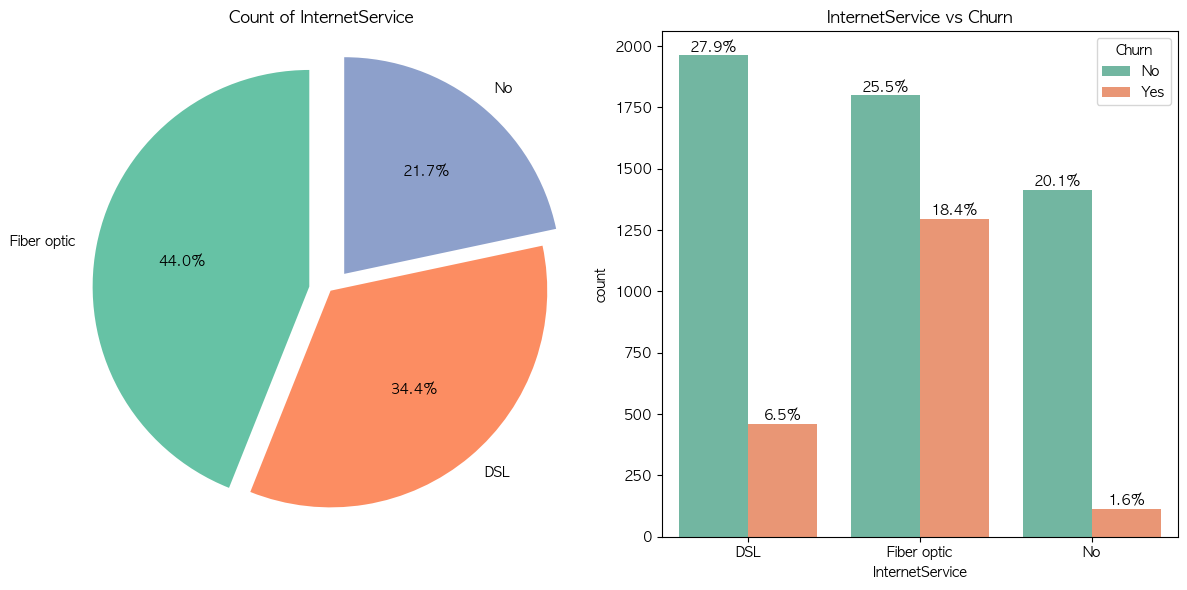

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
col = 'InternetService'

sizes = df[col].value_counts()
labels = sizes.index
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0.1, 0., 0.1), startangle=90, colors=colors)
axes[0].set_title('Count of ' + col)
axes[0].axis('equal')

sns.countplot(x=col, data=df, hue='Churn', palette=palette[0], ax=axes[1])

for p in axes[1].patches:
    height = p.get_height()
    percentage = (height / len(df)) * 100  # 퍼센티지 계산
    if percentage > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.5,
                     '{:.1f}%'.format(percentage),
                     ha='center', va='bottom')

axes[1].set_title(col + ' vs Churn')
plt.tight_layout()
plt.show()

#### Group 3: 고객이 가입한 서비스 정보

OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport | StreamingTV | StreamingMovies


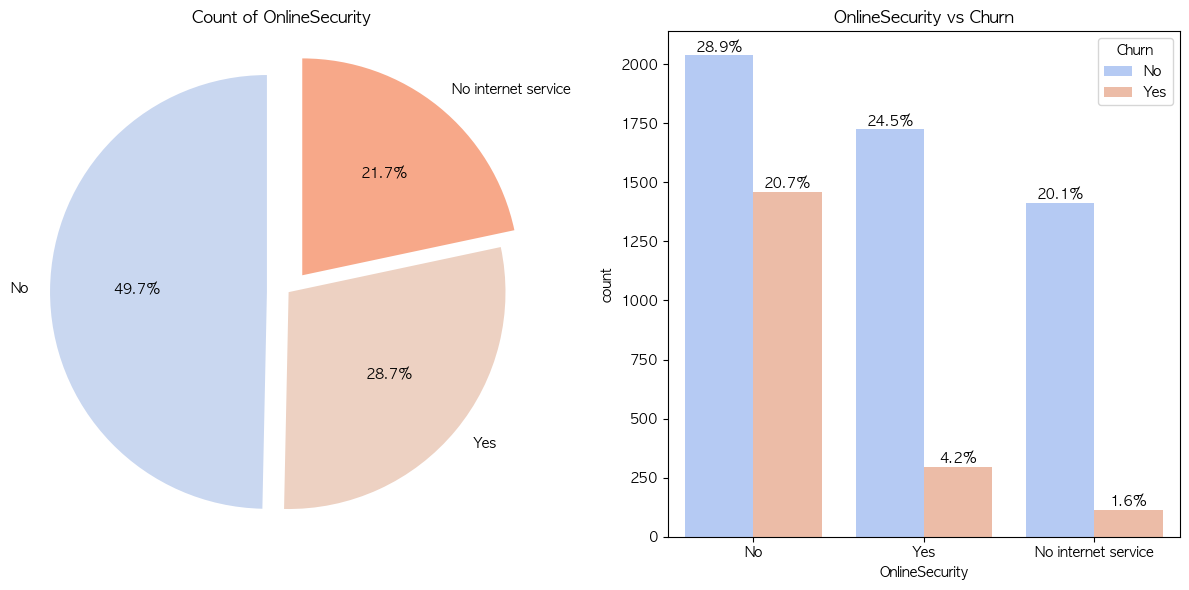

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
col = 'OnlineSecurity'
color_1 = sns.color_palette(palette[1]).as_hex()

sizes = df[col].value_counts()
labels = sizes.index
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0.1, 0, 0.1), startangle=90, colors=color_1[2:])
axes[0].set_title('Count of ' + col)
axes[0].axis('equal')

sns.countplot(x=col, data=df, hue='Churn', palette=palette[1], ax=axes[1])

for p in axes[1].patches:
    height = p.get_height()
    percentage = (height / len(df)) * 100  # 퍼센티지 계산
    if percentage > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.5,
                     '{:.1f}%'.format(percentage),
                     ha='center', va='bottom')

axes[1].set_title(col + ' vs Churn')
plt.tight_layout()
plt.show()

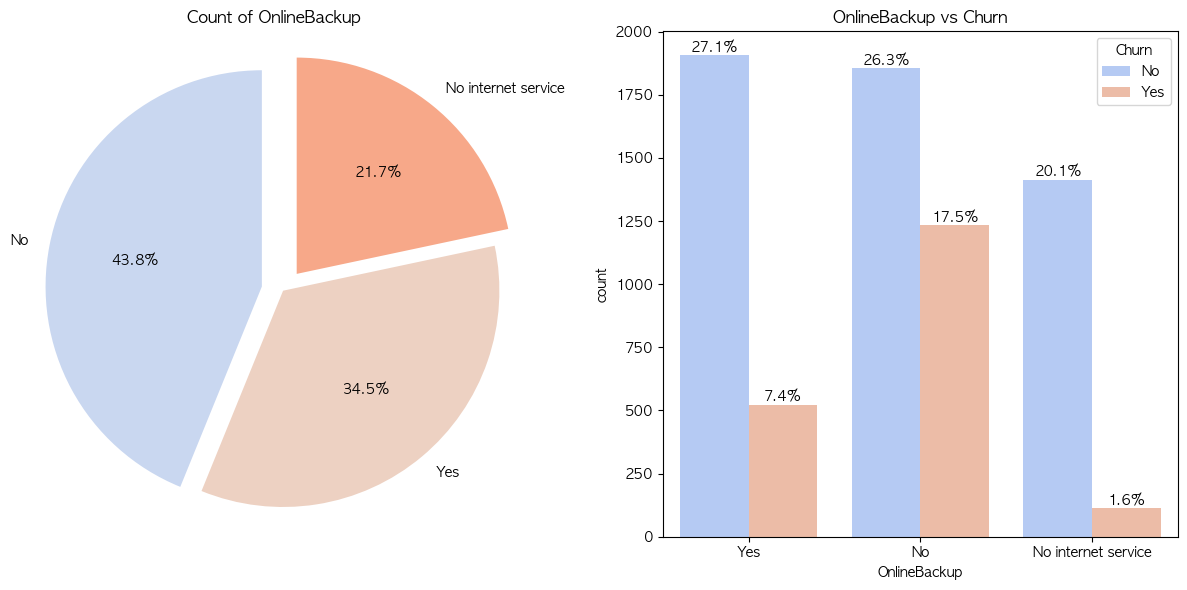

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
col = 'OnlineBackup'
color_1 = sns.color_palette(palette[1]).as_hex()

sizes = df[col].value_counts()
labels = sizes.index
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0.1, 0, 0.1), startangle=90, colors=color_1[2:])
axes[0].set_title('Count of ' + col)
axes[0].axis('equal')

sns.countplot(x=col, data=df, hue='Churn', palette=palette[1], ax=axes[1])

for p in axes[1].patches:
    height = p.get_height()
    percentage = (height / len(df)) * 100  # 퍼센티지 계산
    if percentage > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.5,
                     '{:.1f}%'.format(percentage),
                     ha='center', va='bottom')

axes[1].set_title(col + ' vs Churn')
plt.tight_layout()
plt.show()

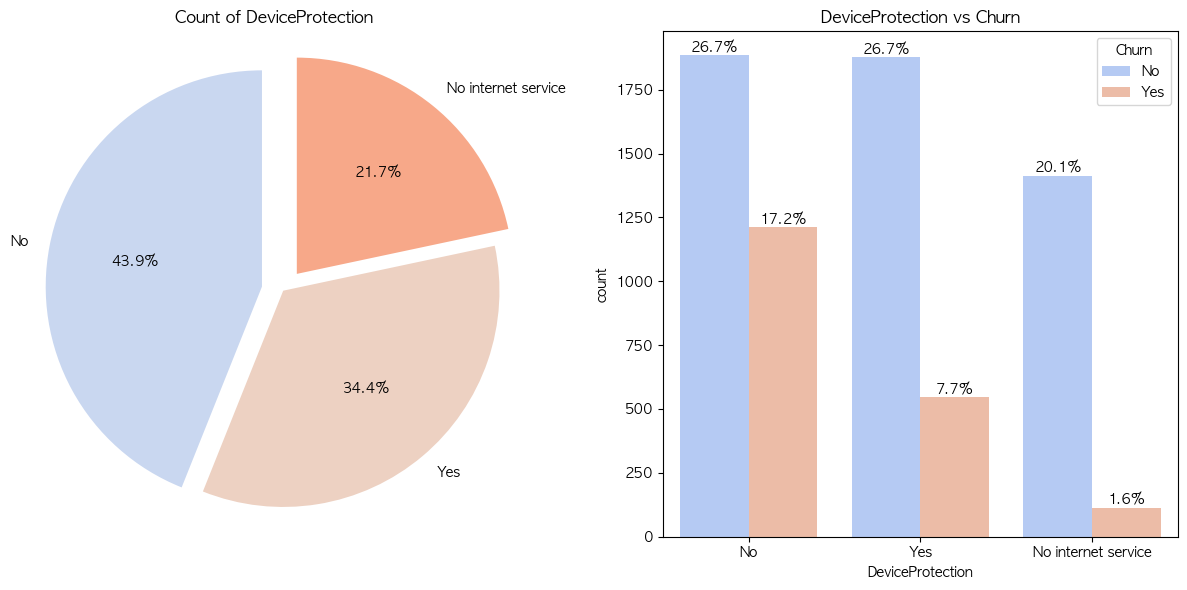

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
col = 'DeviceProtection'
color_1 = sns.color_palette(palette[1]).as_hex()

sizes = df[col].value_counts()
labels = sizes.index
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0.1, 0, 0.1), startangle=90, colors=color_1[2:])
axes[0].set_title('Count of ' + col)
axes[0].axis('equal')

sns.countplot(x=col, data=df, hue='Churn', palette=palette[1], ax=axes[1])

for p in axes[1].patches:
    height = p.get_height()
    percentage = (height / len(df)) * 100  # 퍼센티지 계산
    if percentage > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.5,
                     '{:.1f}%'.format(percentage),
                     ha='center', va='bottom')

axes[1].set_title(col + ' vs Churn')
plt.tight_layout()
plt.show()

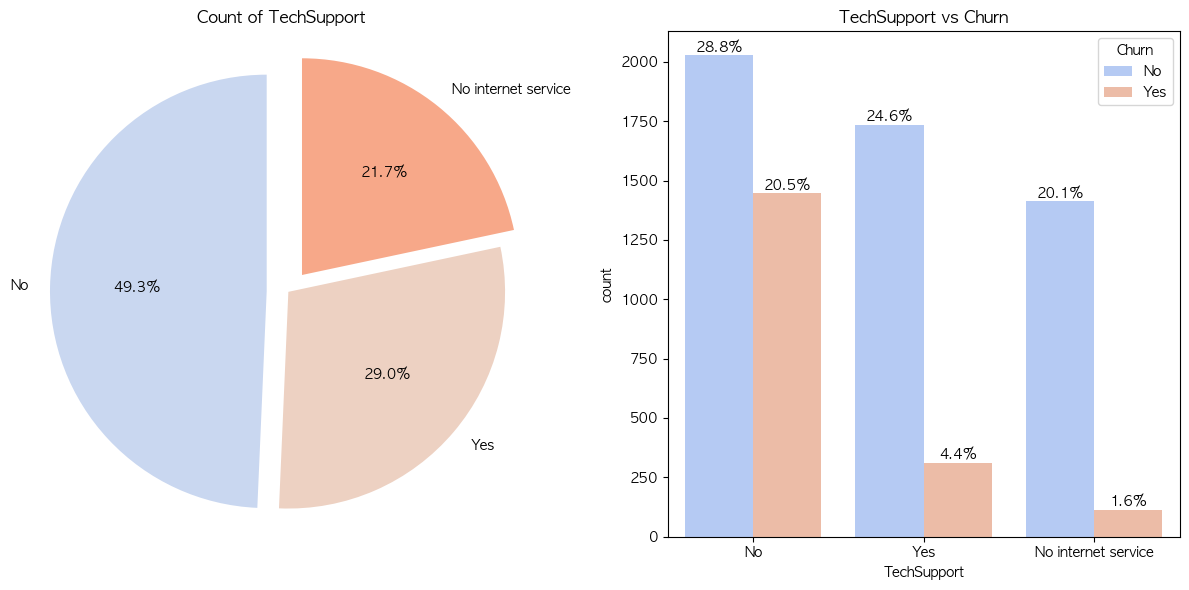

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
col = 'TechSupport'
color_1 = sns.color_palette(palette[1]).as_hex()

sizes = df[col].value_counts()
labels = sizes.index
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0.1, 0, 0.1), startangle=90, colors=color_1[2:])
axes[0].set_title('Count of ' + col)
axes[0].axis('equal')

sns.countplot(x=col, data=df, hue='Churn', palette=palette[1], ax=axes[1])

for p in axes[1].patches:
    height = p.get_height()
    percentage = (height / len(df)) * 100  # 퍼센티지 계산
    if percentage > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.5,
                     '{:.1f}%'.format(percentage),
                     ha='center', va='bottom')

axes[1].set_title(col + ' vs Churn')
plt.tight_layout()
plt.show()

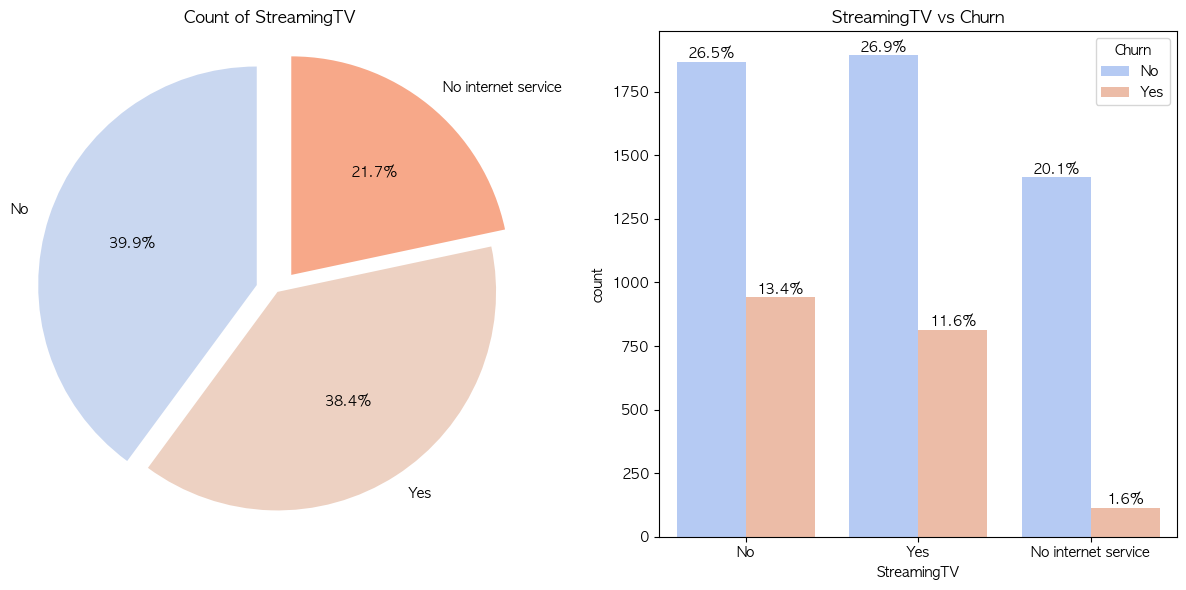

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
col = 'StreamingTV'
color_1 = sns.color_palette(palette[1]).as_hex()

sizes = df[col].value_counts()
labels = sizes.index
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0.1, 0, 0.1), startangle=90, colors=color_1[2:])
axes[0].set_title('Count of ' + col)
axes[0].axis('equal')

sns.countplot(x=col, data=df, hue='Churn', palette=palette[1], ax=axes[1])

for p in axes[1].patches:
    height = p.get_height()
    percentage = (height / len(df)) * 100  # 퍼센티지 계산
    if percentage > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.5,
                     '{:.1f}%'.format(percentage),
                     ha='center', va='bottom')

axes[1].set_title(col + ' vs Churn')
plt.tight_layout()
plt.show()

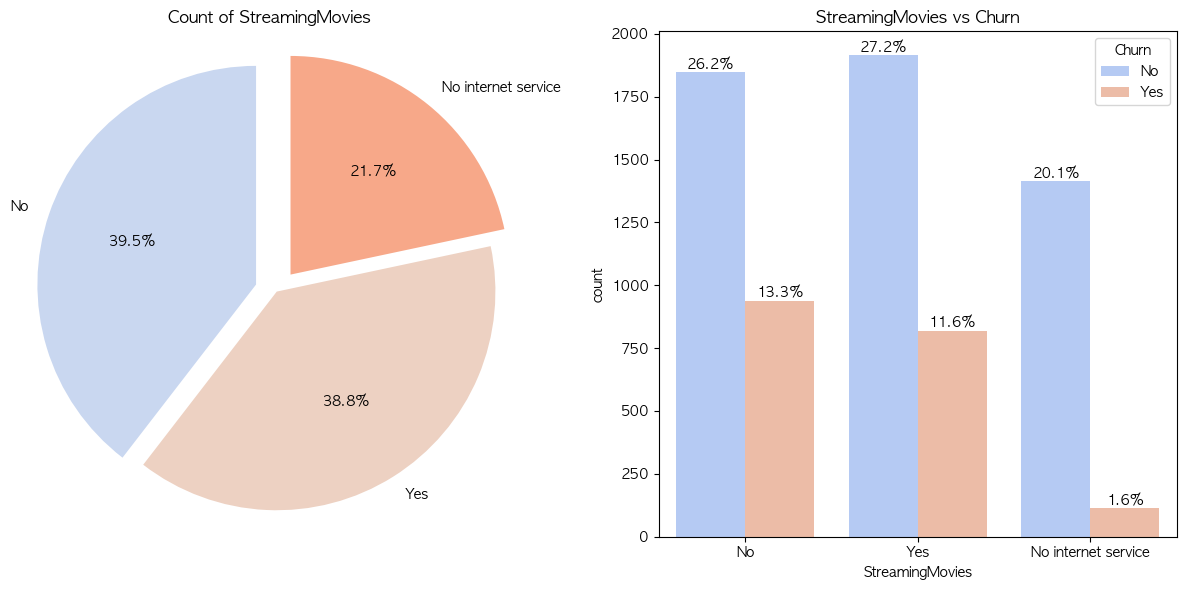

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
col = 'StreamingMovies'
color_1 = sns.color_palette(palette[1]).as_hex()

sizes = df[col].value_counts()
labels = sizes.index
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0.1, 0, 0.1), startangle=90, colors=color_1[2:])
axes[0].set_title('Count of ' + col)
axes[0].axis('equal')

sns.countplot(x=col, data=df, hue='Churn', palette=palette[1], ax=axes[1])

for p in axes[1].patches:
    height = p.get_height()
    percentage = (height / len(df)) * 100  # 퍼센티지 계산
    if percentage > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.5,
                     '{:.1f}%'.format(percentage),
                     ha='center', va='bottom')

axes[1].set_title(col + ' vs Churn')
plt.tight_layout()
plt.show()

#### Group 4: 계약 기간 및 결제 정보

Contract | PaperlessBilling | PaymentMethod |

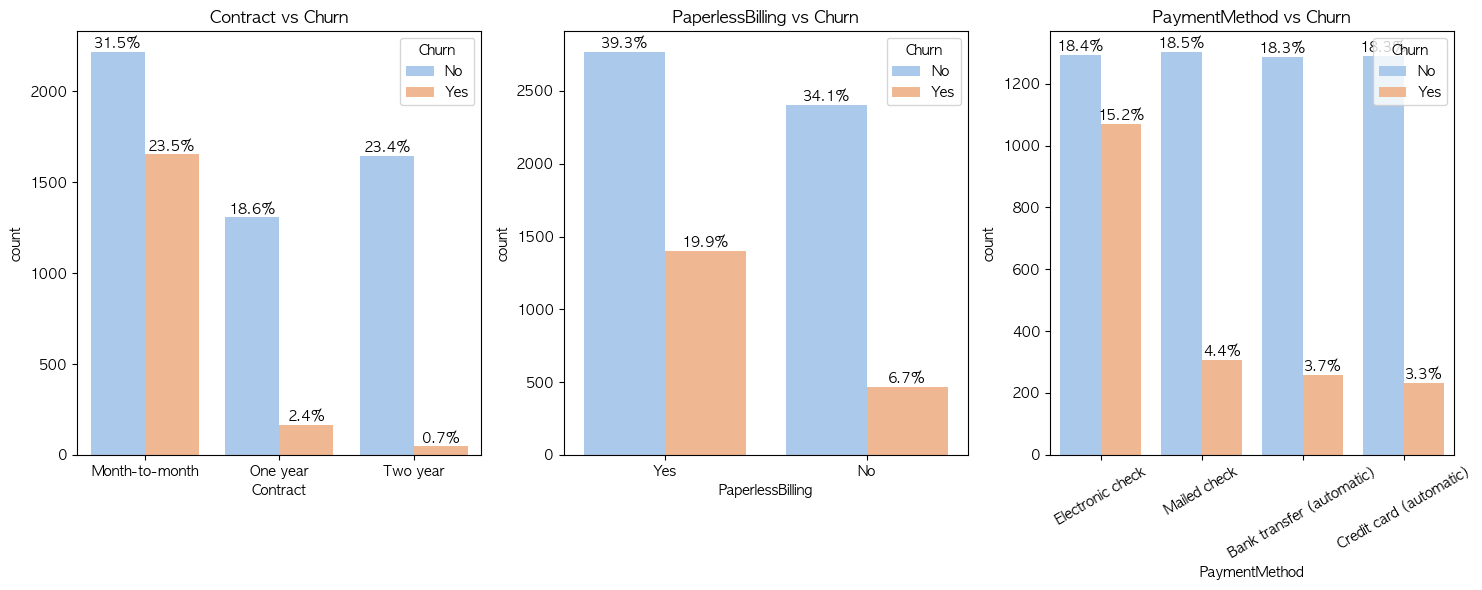

In [17]:
fig = plt.subplots(1, 3, figsize=(15, 6))

cols = ['Contract', 'PaperlessBilling', 'PaymentMethod']

for i, col in enumerate(cols):
    plt.subplot(1,3,i+1)
    col_len = len(df[col].value_counts())
    ax = sns.countplot(x=col, data=df, hue="Churn", palette=palette[3])
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / len(df)) * 100  # 퍼센티지 계산
        if percentage > 0:
            ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
                        '{:.1f}%'.format(percentage),
                        ha='center', va='bottom')
    if i == 2:
        ax.tick_params(axis='x', rotation=30)
    
    ax.set_title(col + ' vs Churn')
    
plt.tight_layout()
plt.show()

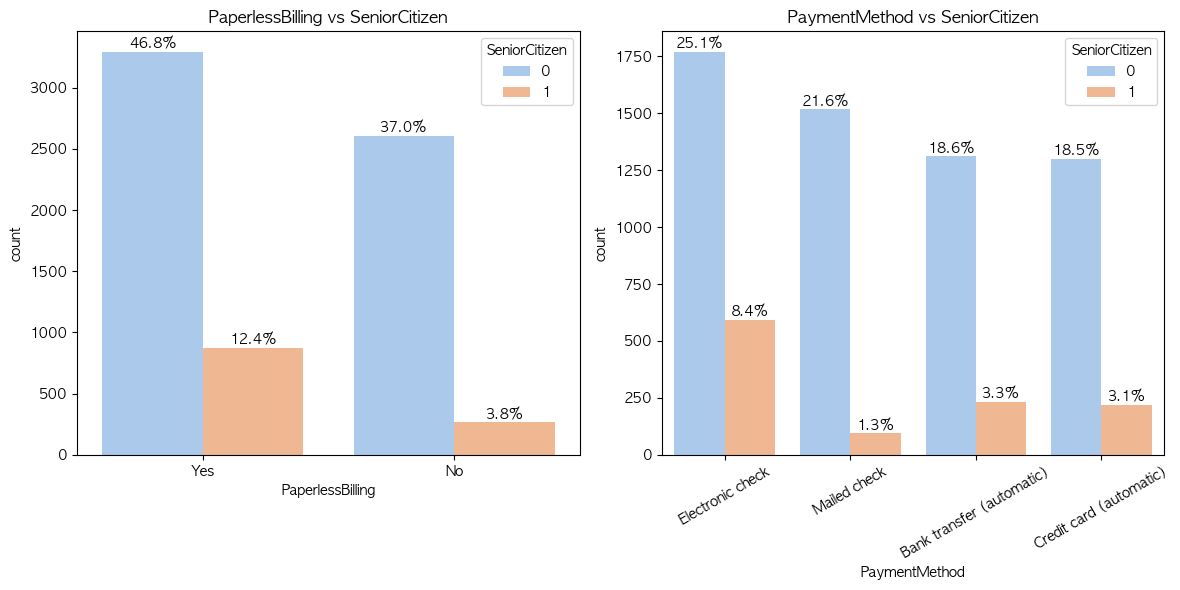

In [18]:
# SeniorCitizen 변수와 비교

fig = plt.subplots(1, 2, figsize=(12, 6))

cols = ['PaperlessBilling', 'PaymentMethod']

for i, col in enumerate(cols):
    plt.subplot(1, 2, i+1)
    col_len = len(df[col].value_counts())
    ax = sns.countplot(x=col, data=df, hue="SeniorCitizen", palette=palette[3])
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / len(df)) * 100  # 퍼센티지 계산
        if percentage > 0:
            ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
                        '{:.1f}%'.format(percentage),
                        ha='center', va='bottom')
    if i == 1:
        ax.tick_params(axis='x', rotation=30)
    
    ax.set_title(col + ' vs SeniorCitizen')
    
plt.tight_layout()
plt.show()

### 2-3. Numerical 변수 시각화

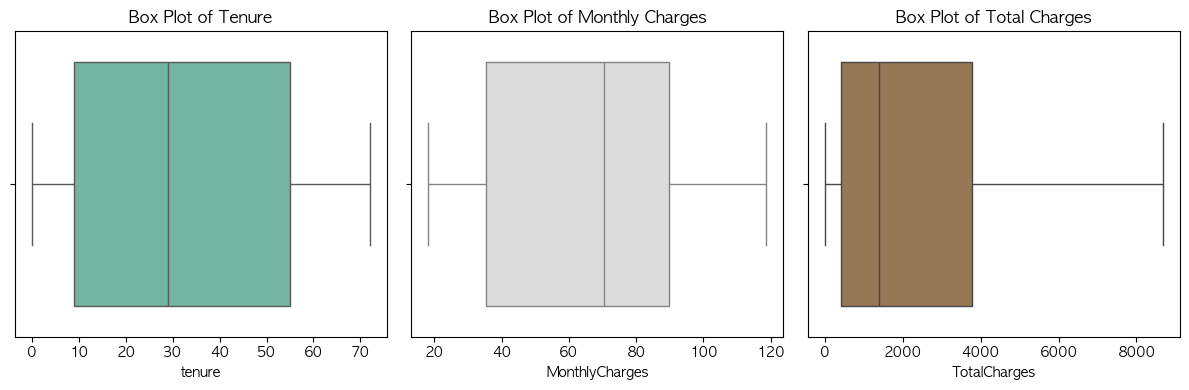

In [19]:
# 박스 플롯
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(x="tenure", data=df, ax=ax1, palette=palette[0])
ax1.set_title('Box Plot of Tenure')

sns.boxplot(x="MonthlyCharges", data=df, ax=ax2, palette=palette[1])
ax2.set_title('Box Plot of Monthly Charges')

sns.boxplot(x="TotalCharges", data=df, ax=ax3, palette=palette[2])
ax3.set_title('Box Plot of Total Charges')

plt.tight_layout()
plt.show()

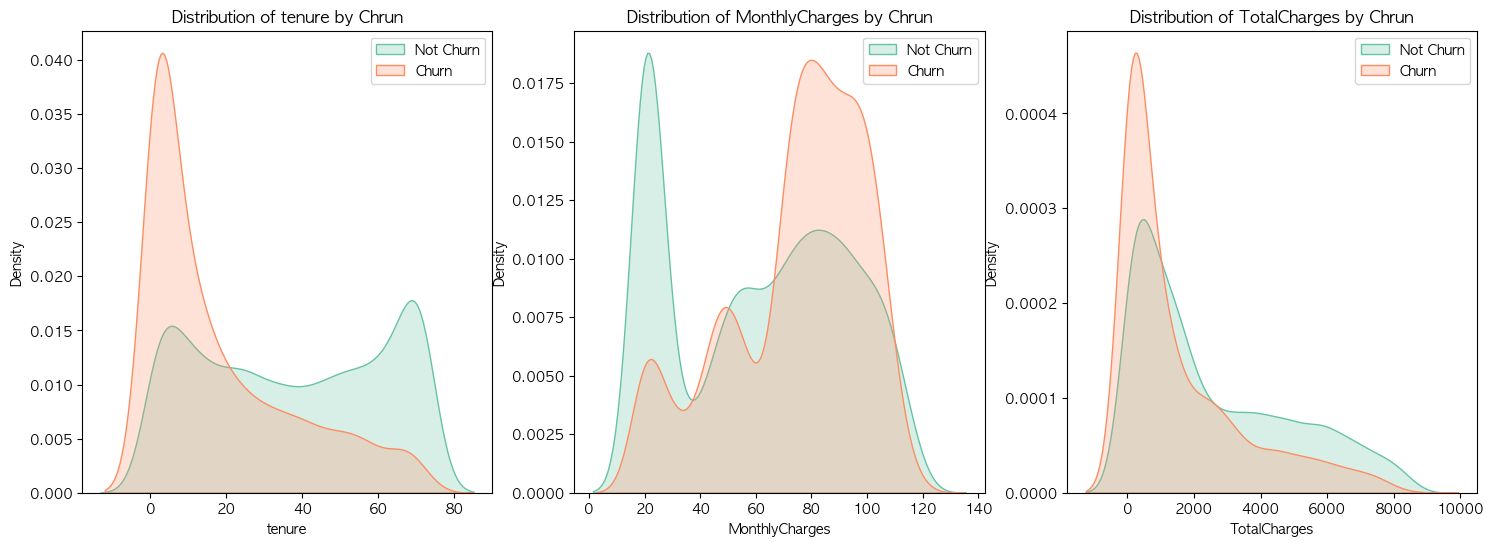

In [20]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i in range(len(numerical_features)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df[numerical_features[i]][(df["Churn"] == 'No') ], color=colors[0], shade=True)
    sns.kdeplot(df[numerical_features[i]][(df["Churn"] == 'Yes') ], color=colors[1], shade=True)
    plt.legend(["Not Churn","Churn"],loc='upper right')
    plt.ylabel('Density')
    plt.xlabel(numerical_features[i])
    title = 'Distribution of ' + numerical_features[i] + ' by Chrun'
    plt.title(title)

plt.show()

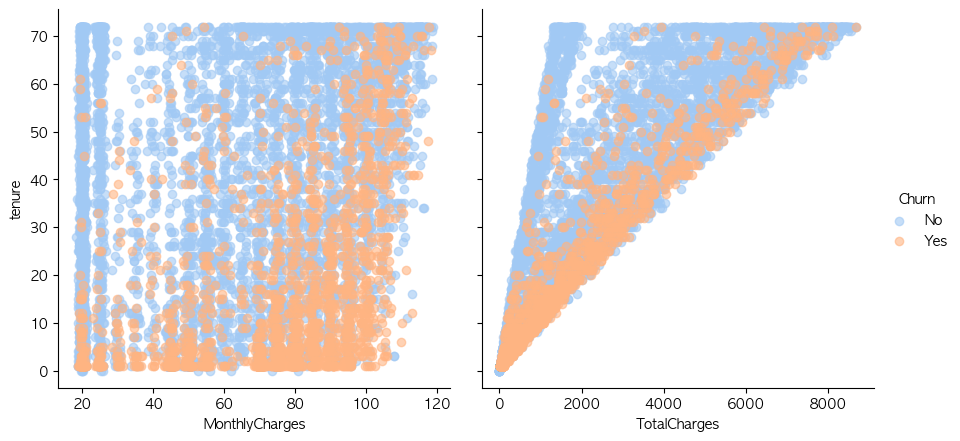

In [21]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", palette=palette[3])
ax = g.map(plt.scatter, alpha=0.6)
g.add_legend()

plt.show()

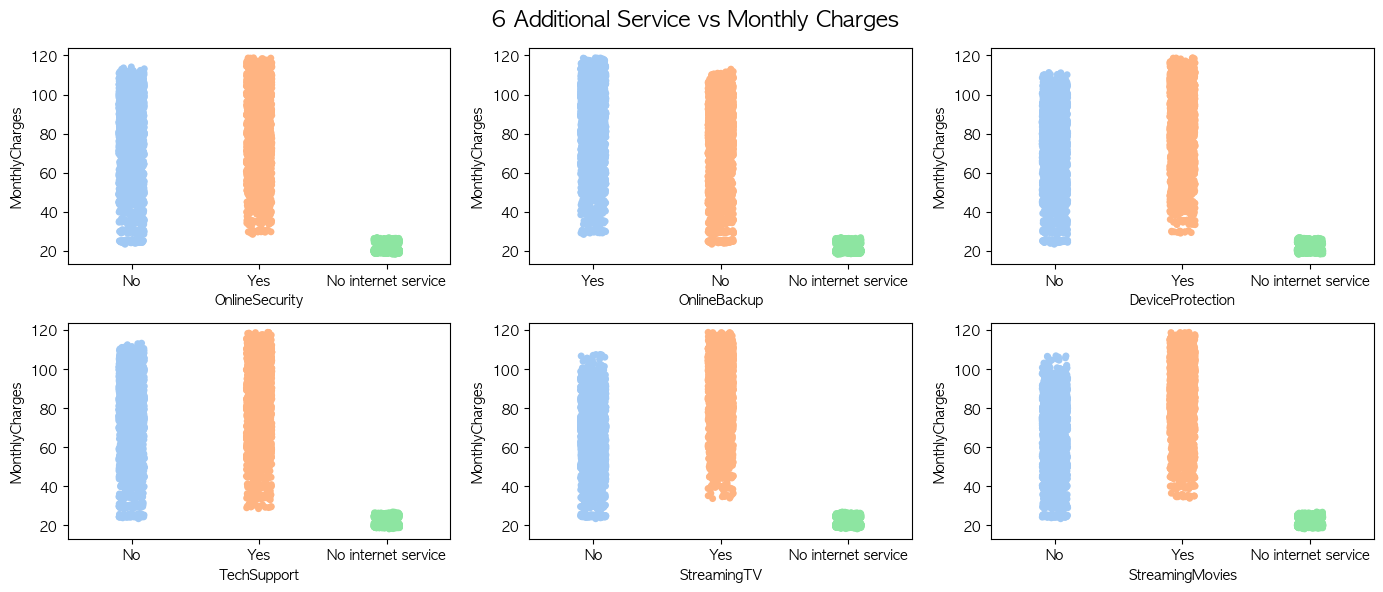

In [22]:
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, ax = plt.subplots(2, 3, figsize=(14,6))

for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.stripplot(x=df[service_cols[i-1]], y=df['MonthlyCharges'], palette=palette[3])

fig.suptitle('6 Additional Service vs Monthly Charges', fontsize=16)
plt.tight_layout()
plt.show()

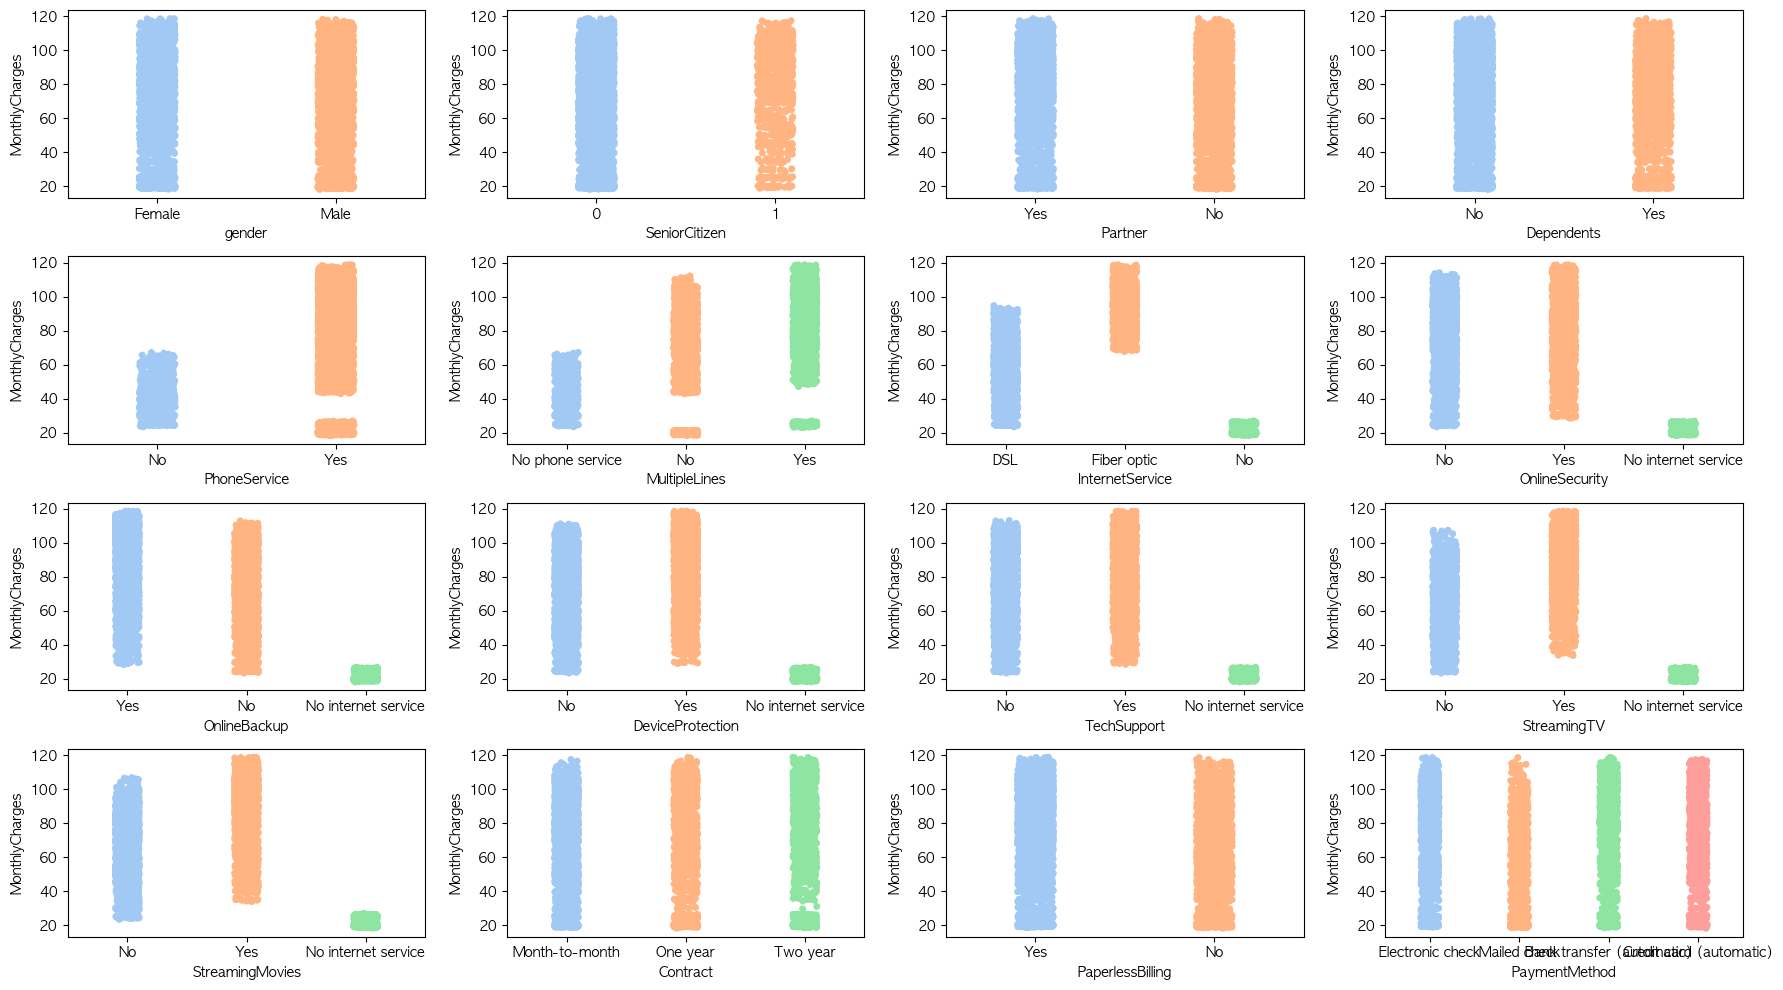

In [24]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, ax = plt.subplots(4, 4, figsize=(18,10))

for i in range(1, 17):
    plt.subplot(4, 4, i)
    sns.stripplot(x=df[cols[i-1]], y=df['MonthlyCharges'], palette=palette[3])
plt.tight_layout()
plt.show()

### 2-4. 클러스터링 및 시각화

In [16]:
cluster_df = df.apply(lambda x: pd.factorize(x)[0]).drop(['customerID', 'Churn'], axis=1)
cluster_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2
3,1,0,1,0,3,0,0,0,1,1,1,1,0,0,1,1,2,3,3
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4


In [17]:
scale = StandardScaler()
scaled_df = scale.fit_transform(cluster_df)
scaled_df = pd.DataFrame(scaled_df, columns=cluster_df.columns)
scaled_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,-1.034530,-0.654012,-1.429631,-3.054010,-2.061669,-1.183234,-0.903589,-1.180777,-0.998016,-0.909172,-1.071457,-1.07821,-0.828207,-0.829798,-1.145198,-1.374349,-1.667320
1,0.990532,-0.439916,0.966622,-0.654012,-1.382789,0.327438,-0.505697,-1.183234,0.351386,0.173655,0.286059,-0.909172,-1.071457,-1.07821,0.371271,1.205113,-0.274744,-1.371920,-1.666793
2,0.990532,-0.439916,0.966622,-0.654012,-1.335948,0.327438,-0.505697,-1.183234,0.351386,-1.180777,-0.998016,-0.909172,-1.071457,-1.07821,-0.828207,-0.829798,-0.274744,-1.369490,-1.666265
3,0.990532,-0.439916,0.966622,-0.654012,-1.289107,-3.054010,-2.061669,-1.183234,0.351386,0.173655,0.286059,0.347362,-1.071457,-1.07821,0.371271,1.205113,0.595711,-1.367061,-1.665737
4,-1.009559,-0.439916,0.966622,-0.654012,-1.335948,0.327438,-0.505697,0.172250,-0.903589,0.173655,-0.998016,-0.909172,-1.071457,-1.07821,-0.828207,-0.829798,-1.145198,-1.364632,-1.665210


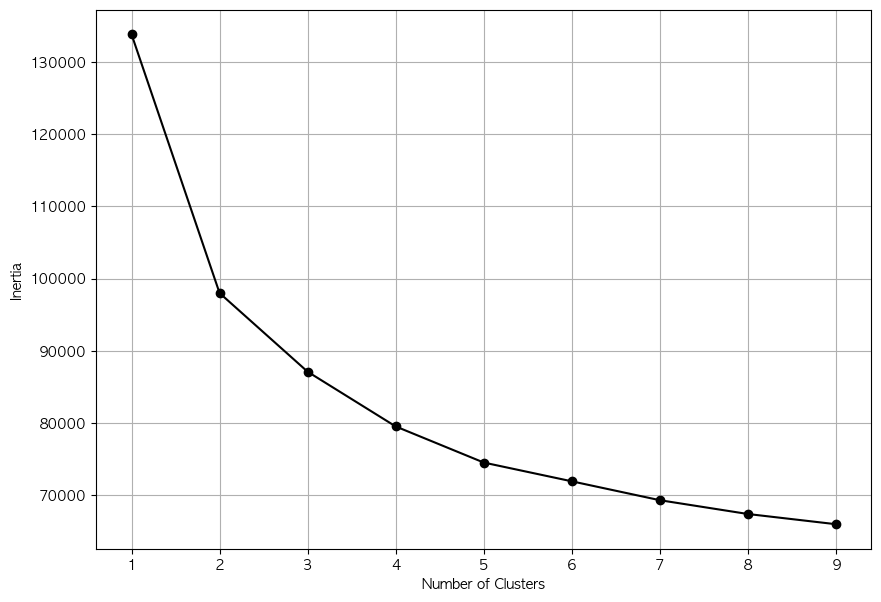

In [21]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 7))
    plt.plot(means, inertias, 'o-', color = 'black')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    
optimize_k_means(scaled_df, 10)

In [24]:
optimal_num = 3

kmeans = KMeans(n_clusters=optimal_num, random_state=42)
kmeans.fit(scaled_df)

scaled_df['Cluster'] = kmeans.labels_
scaled_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cluster
0,-1.009559,-0.439916,-1.034530,-0.654012,-1.429631,-3.054010,-2.061669,-1.183234,-0.903589,-1.180777,-0.998016,-0.909172,-1.071457,-1.07821,-0.828207,-0.829798,-1.145198,-1.374349,-1.667320,0
1,0.990532,-0.439916,0.966622,-0.654012,-1.382789,0.327438,-0.505697,-1.183234,0.351386,0.173655,0.286059,-0.909172,-1.071457,-1.07821,0.371271,1.205113,-0.274744,-1.371920,-1.666793,2
2,0.990532,-0.439916,0.966622,-0.654012,-1.335948,0.327438,-0.505697,-1.183234,0.351386,-1.180777,-0.998016,-0.909172,-1.071457,-1.07821,-0.828207,-0.829798,-0.274744,-1.369490,-1.666265,2
3,0.990532,-0.439916,0.966622,-0.654012,-1.289107,-3.054010,-2.061669,-1.183234,0.351386,0.173655,0.286059,0.347362,-1.071457,-1.07821,0.371271,1.205113,0.595711,-1.367061,-1.665737,0
4,-1.009559,-0.439916,0.966622,-0.654012,-1.335948,0.327438,-0.505697,0.172250,-0.903589,0.173655,-0.998016,-0.909172,-1.071457,-1.07821,-0.828207,-0.829798,-1.145198,-1.364632,-1.665210,2


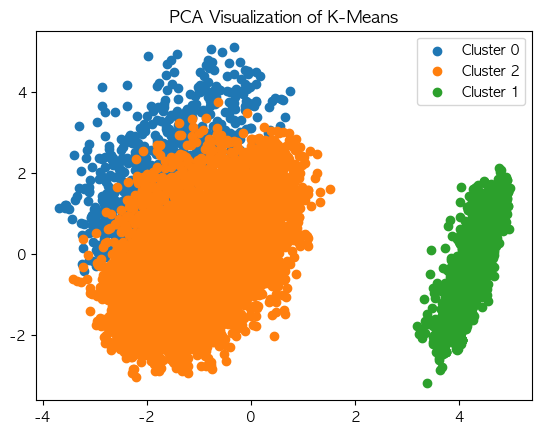

In [40]:
# PCA Visualization
X = scaled_df.drop(['Cluster'], axis=1)
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['Cluster'] = scaled_df['Cluster']

for i in scaled_df['Cluster'].unique():
    tmp = pca_df.loc[pca_df['Cluster']==i]
    plt.scatter(tmp[0], tmp[1], label=f'Cluster {i}')
    plt.title("PCA Visualization of K-Means")
    plt.legend()
plt.show()

In [48]:
pd.concat([scaled_df, df['Churn']], axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cluster,Churn
0,-1.009559,-0.439916,-1.034530,-0.654012,-1.429631,-3.054010,-2.061669,-1.183234,-0.903589,-1.180777,...,-0.909172,-1.071457,-1.078210,-0.828207,-0.829798,-1.145198,-1.374349,-1.667320,0,No
1,0.990532,-0.439916,0.966622,-0.654012,-1.382789,0.327438,-0.505697,-1.183234,0.351386,0.173655,...,-0.909172,-1.071457,-1.078210,0.371271,1.205113,-0.274744,-1.371920,-1.666793,2,No
2,0.990532,-0.439916,0.966622,-0.654012,-1.335948,0.327438,-0.505697,-1.183234,0.351386,-1.180777,...,-0.909172,-1.071457,-1.078210,-0.828207,-0.829798,-0.274744,-1.369490,-1.666265,2,Yes
3,0.990532,-0.439916,0.966622,-0.654012,-1.289107,-3.054010,-2.061669,-1.183234,0.351386,0.173655,...,0.347362,-1.071457,-1.078210,0.371271,1.205113,0.595711,-1.367061,-1.665737,0,No
4,-1.009559,-0.439916,0.966622,-0.654012,-1.335948,0.327438,-0.505697,0.172250,-0.903589,0.173655,...,-0.909172,-1.071457,-1.078210,-0.828207,-0.829798,-1.145198,-1.364632,-1.665210,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,-1.034530,1.529024,1.615061,0.327438,1.050276,-1.183234,0.351386,0.173655,...,0.347362,0.238887,0.234693,0.371271,-0.829798,-0.274744,-0.657741,1.776392,2,No
7039,-1.009559,-0.439916,-1.034530,1.529024,-0.445961,0.327438,1.050276,0.172250,-0.903589,-1.180777,...,-0.909172,0.238887,0.234693,0.371271,-0.829798,1.466165,0.474257,1.776920,2,No
7040,-1.009559,-0.439916,-1.034530,1.529024,-0.211754,-3.054010,-2.061669,-1.183234,0.351386,0.173655,...,-0.909172,-1.071457,-1.078210,-0.828207,-0.829798,-1.145198,-0.878796,1.777448,0,No
7041,0.990532,2.273159,-1.034530,-0.654012,1.099806,0.327438,1.050276,0.172250,-0.903589,0.173655,...,-0.909172,-1.071457,-1.078210,-0.828207,-0.829798,-0.274744,-1.099852,1.777975,2,Yes


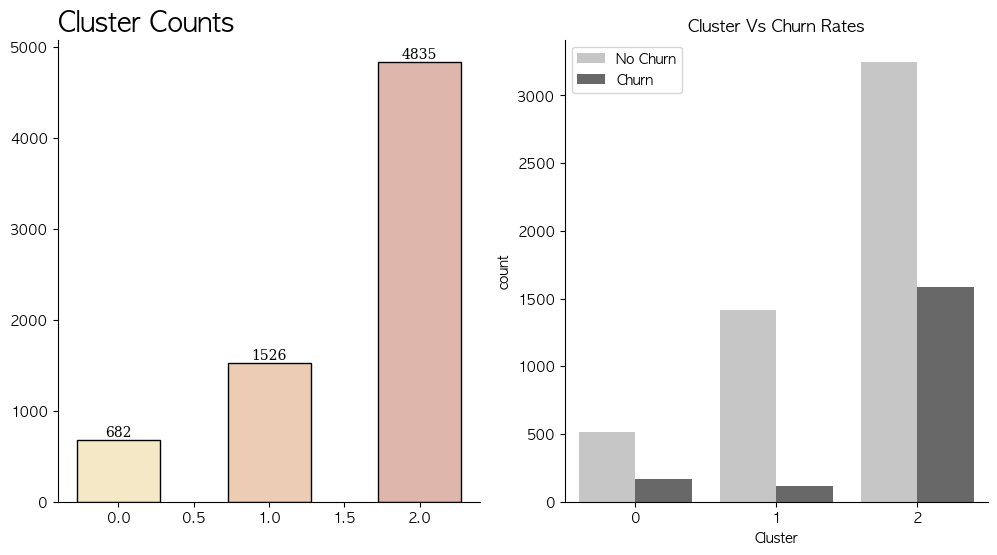

In [50]:
# Cluster Counts
fig, ax = plt.subplots(1,2, figsize=(12, 6))
data_temp = scaled_df['Cluster'].value_counts().sort_index()
ax[0].bar(data_temp.index, data_temp,
          edgecolor='black', color=['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088']
       ,width=0.55 )
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}", 
                   xy=(i, data_temp[i] + 80),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)
    
sns.countplot(x='Cluster', hue="Churn", palette="Greys", data=pd.concat([scaled_df, df['Churn']], axis=1))
sns.despine()
plt.legend(title='', loc='upper left', labels=['No Churn', 'Churn'])
plt.title("Cluster Vs Churn Rates")
plt.show()

### 2-5. 데이터 전처리 및 상관관계 분석

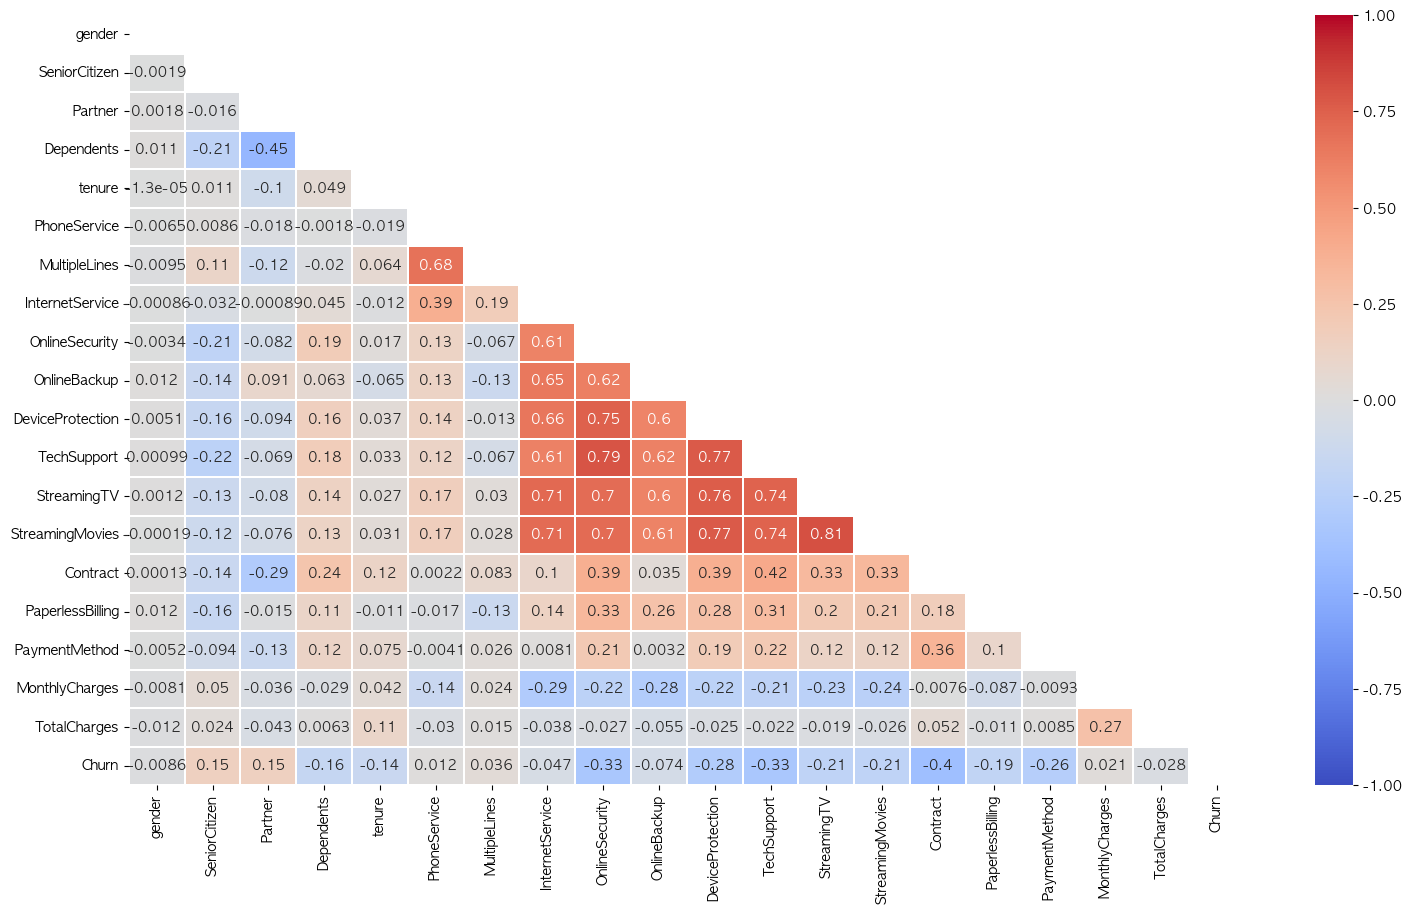

In [23]:
plt.figure(figsize=(18, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).drop(['customerID'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [7]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [25]:
# 범주형 파생 변수 생성
# 1. tenure_bin
def create_tenure_bin(x):
    if x < 24:
        return 'short'
    elif x < 48:
        return 'mid'
    else:
        return 'long'

def create_monthly_charge_group(x):
    # low mid high very high
    if x < 30:
        return 'low'
    elif x < 60:
        return 'mid'
    elif x < 90:
        return 'high'
    else:
        return 'very high'

def create_Total_charge_group(x):
    if x < 3000:
        return 'low'
    elif x < 6000:
        return 'mid'
    else:
        return 'high'

df['tenure_bin'] = df['tenure'].apply(create_tenure_bin)
df['MonthlyCharges_group'] = df['MonthlyCharges'].apply(create_monthly_charge_group)
df['TotalCharges_group'] = df['TotalCharges'].apply(create_Total_charge_group)

In [27]:
df.to_csv('./Cat_Preprocessed_Telco_Customer_Churn.csv', encoding='utf-8', index=False)

In [28]:
# 파생 변수 생성
# 1. tenure bin
df['tenure_short'] = df['tenure'].apply(lambda x: 1 if x < 24 else 0)
df['tenure_mid'] = df['tenure'].apply(lambda x: 1 if x >= 24 and x < 48 else 0)
df['tenure_long'] = df['tenure'].apply(lambda x: 1 if x >= 48 else 0)

# 2. Monhtly Charges group
df['MonthlyCharges_group1'] = df['MonthlyCharges'].apply(lambda x: 1 if x < 30 else 0)
df['MonthlyCharges_group2'] = df['MonthlyCharges'].apply(lambda x: 1 if x >= 30 and x < 60 else 0)
df['MonthlyCharges_group3'] = df['MonthlyCharges'].apply(lambda x: 1 if x >= 60 and x < 90 else 0)
df['MonthlyCharges_group4'] = df['MonthlyCharges'].apply(lambda x: 1 if x >= 90 else 0)

# 3. Total Charges group
df['TotalCharges_group1'] = df['TotalCharges'].apply(lambda x: 1 if x < 3000 else 0)
df['TotalCharges_group2'] = df['TotalCharges'].apply(lambda x: 1 if x >= 3000 and x < 6000 else 0)
df['TotalCharges_group3'] = df['TotalCharges'].apply(lambda x: 1 if x >= 6000 else 0)

In [29]:
# get_dummies
ramain_vars = ['customerID', 'Churn', 
                'tenure_short', 'tenure_mid', 'tenure_long', 'MonthlyCharges_group1',
                'MonthlyCharges_group2', 'MonthlyCharges_group3',
                'MonthlyCharges_group4', 'TotalCharges_group1', 'TotalCharges_group2',
                'TotalCharges_group3', 'tenure', 'MonthlyCharges', 'TotalCharges',
                'tenure_bin', 'MonthlyCharges_group', 'TotalCharges_group']
categorical_vars = df.drop(ramain_vars, axis=1)
cat_df = pd.get_dummies(categorical_vars).astype(int)
df['Churn'] = df['Churn'].replace({"No": 0, "Yes": 1})
df = pd.concat([cat_df, df[ramain_vars]], axis=1)

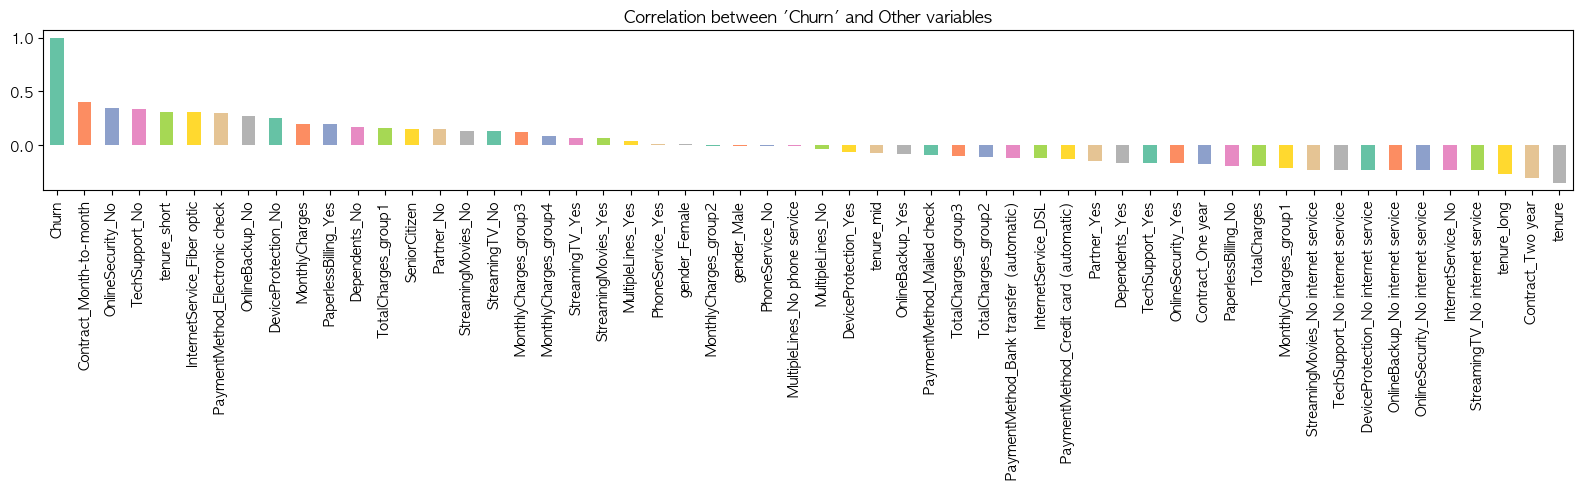

In [30]:
# 'Churn' 변수와의 상관관계
plt.figure(figsize=(16,5))
tmp_df = df.drop(['customerID'], axis=1)
tmp_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color=colors)
plt.title("Correlation between 'Churn' and Other variables")
plt.tight_layout()
plt.show()

In [34]:
df = df.drop(['tenure_bin', 'MonthlyCharges_group', 'TotalCharges_group'], axis=1)
df.to_csv('./Preprocessed_Telco_Customer_Churn.csv', encoding='utf-8', index=False)